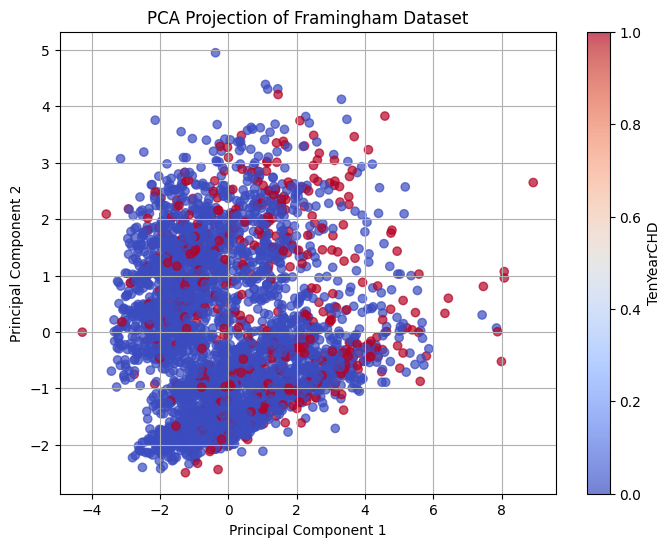

In [47]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Đọc dữ liệu
data = pd.read_csv("D:\\Python\\MachineLearning\\MachineLearning\\week06\\data\\framingham.csv")
data.isnull().sum()
# Loại bỏ các hàng có giá trị null
data = data.dropna(how="any", axis=0)

# Chọn các features
features = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 
            'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 
            'diaBP', 'BMI', 'heartRate', 'glucose']

# Chuẩn bị dữ liệu
X = data[features]
y = data['TenYearCHD']

# Scale dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Giảm chiều dữ liệu xuống còn 2 chiều bằng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Biểu đồ phân tán của dữ liệu sau khi giảm chiều
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Framingham Dataset')
plt.colorbar(label='TenYearCHD')
plt.grid(True)
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Chia dữ liệu thành tập huấn luyện và tập validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred = perceptron.predict(X_val)

# Tính các độ đo
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.24703737465815861
Precision: 0.16322314049586778
Recall: 0.9080459770114943


Accuracy: Khoảng 24.70% cho thấy mô hình dự đoán đúng khoảng 24.70% trên tổng số mẫu trong tập validation. Tuy nhiên, độ đo này không nói lên nhiều về hiệu suất của mô hình khi mà số lượng các trường hợp âm (không phát hiện bệnh) nhiều hơn nhiều so với số lượng trường hợp dương (phát hiện bệnh).

Precision: Khoảng 16.32% cho biết trong những trường hợp được dự đoán là dương tính (có bệnh), chỉ khoảng 16.32% thực sự là trường hợp dương tính. Điều này đề xuất rằng mô hình tạo ra nhiều false positive (dự đoán một trường hợp là dương tính nhưng thực sự là tiêu cực).

Recall: Khoảng 90.80% cho biết mô hình có khả năng phát hiện được khoảng 90.80% các trường hợp dương tính thực sự. Điều này đề xuất rằng mô hình có khả năng phát hiện bệnh (có hiệu suất cao trong việc không bỏ sót các trường hợp dương tính).

Tổng thể, mô hình Perceptron dường như có vấn đề với việc tạo ra quá nhiều false positive, điều này có thể cần được cải thiện để đảm bảo mô hình có hiệu suất cao hơn trong việc dự đoán các trường hợp dương tính mà không tạo ra quá nhiều báo động sai.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Chia dữ liệu thành tập huấn luyện và tập validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình log
logReg = LogisticRegression(penalty=None, max_iter=5000) 
logReg.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred = logReg.predict(X_val)

# Tính các độ đo
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8468550592525068
Precision: 0.6071428571428571
Recall: 0.09770114942528736


Accuracy: 0.8469 (khoảng 84.69%)
Precision: 0.6071 (khoảng 60.71%)
Recall: 0.0977 (khoảng 9.77%)
So với kết quả trước khi tăng số lượng vòng lặp, chúng ta thấy có sự cải thiện đáng kể trong các độ đo Accuracy và Precision, trong khi Recall giảm đi một chút.

Accuracy: Accuracy đã tăng lên đáng kể, từ khoảng 24.70% lên 84.69%, cho thấy mô hình Logistic Regression hoạt động tốt hơn trong việc dự đoán trên tập validation sau khi tăng số lượng vòng lặp.

Precision: Precision cũng tăng lên, từ khoảng 16.32% lên 60.71%, cho thấy mô hình giảm đi số lượng false positive và tạo ra ít hơn các báo động sai.

Recall: Mặc dù Recall giảm một chút, nó vẫn còn khá thấp ở mức khoảng 9.77%, cho thấy mô hình vẫn bỏ sót một số lượng lớn các trường hợp dương tính thực sự.

In [51]:
# Tiền xử lý dữ liệu
data.fillna(data.mean(), inplace=True)

# Chia dữ liệu thành các features và target
X = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Xây dựng mô hình
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Các features liên tục
continuous_features = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train[continuous_features], y_train)

# Các features rời rạc
discrete_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train[discrete_features], y_train)

# Dự đoán trên tập kiểm tra
y_pred_continuous = gaussian_nb.predict(X_test[continuous_features])
y_pred_discrete = multinomial_nb.predict(X_test[discrete_features])

# Tính toán độ đo
accuracy_continuous = accuracy_score(y_test, y_pred_continuous)
accuracy_discrete = accuracy_score(y_test, y_pred_discrete)

# In kết quả
print("Accuracy for continuous features (Gaussian NB):", accuracy_continuous)
print("Accuracy for discrete features (Multinomial NB):", accuracy_discrete)

from sklearn.base import BaseEstimator, ClassifierMixin

class CombinedNaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self, gaussian_features, multinomial_features):
        self.gaussian_features = gaussian_features
        self.multinomial_features = multinomial_features
        self.gaussian_nb = GaussianNB()
        self.multinomial_nb = MultinomialNB()

    def fit(self, X, y):
        self.gaussian_nb.fit(X[self.gaussian_features], y)
        self.multinomial_nb.fit(X[self.multinomial_features], y)
        return self

    def predict_proba(self, X):
        gaussian_prob = self.gaussian_nb.predict_proba(X[self.gaussian_features])
        multinomial_prob = self.multinomial_nb.predict_proba(X[self.multinomial_features])
        combined_prob = (gaussian_prob + multinomial_prob) / 2  # Combine probabilities
        return combined_prob

    def predict(self, X):
        combined_prob = self.predict_proba(X)
        return np.argmax(combined_prob, axis=1)

combined_nb = CombinedNaiveBayes(continuous_features, discrete_features)
combined_nb.fit(X_train, y_train)
y_pred_combined = combined_nb.predict(X_test)
accuracy_combined = accuracy_score(y_test, y_pred_combined)
print("Accuracy for combined model (Gaussian + Multinomial NB):", accuracy_combined)



Accuracy for continuous features (Gaussian NB): 0.8176845943482224
Accuracy for discrete features (Multinomial NB): 0.8404740200546946
Accuracy for combined model (Gaussian + Multinomial NB): 0.8322698268003647


3) Hãy thực hiện lại câu 2) với dữ liệu đã giảm chiều thu được ở câu 1). Hãy giải thích về kết quả
thu được của các mô hình cũng như nhận xét trên độ chính xác của mỗi mô hình. Cho biết mô
hình nào chịu ảnh hưởng nhiều nhất khi giảm chiều dữ liệu.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Chia dữ liệu đã giảm chiều thành tập huấn luyện và tập validation
X_train_pca, X_val_pca, y_train, y_val = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình Perceptron
perceptron = Perceptron()
perceptron.fit(X_train_pca, y_train)

# Dự đoán trên tập validation
y_pred_perceptron = perceptron.predict(X_val_pca)

# Tính các độ đo cho mô hình Perceptron
accuracy_perceptron = accuracy_score(y_val, y_pred_perceptron)
precision_perceptron = precision_score(y_val, y_pred_perceptron)
recall_perceptron = recall_score(y_val, y_pred_perceptron)

print("Perceptron:")
print("Accuracy:", accuracy_perceptron)
print("Precision:", precision_perceptron)
print("Recall:", recall_perceptron)

# Huấn luyện mô hình Logistic Regression
logReg = LogisticRegression(penalty=None, max_iter=5000)
logReg.fit(X_train_pca, y_train)

# Dự đoán trên tập validation
y_pred_logReg = logReg.predict(X_val_pca)

# Tính các độ đo cho mô hình Logistic Regression
accuracy_logReg = accuracy_score(y_val, y_pred_logReg)
precision_logReg = precision_score(y_val, y_pred_logReg)
recall_logReg = recall_score(y_val, y_pred_logReg)

print("\nLogistic Regression:")
print("Accuracy:", accuracy_logReg)
print("Precision:", precision_logReg)
print("Recall:", recall_logReg)


Perceptron:
Accuracy: 0.8395624430264357
Precision: 0.0
Recall: 0.0

Logistic Regression:
Accuracy: 0.8422971741112124
Precision: 0.5454545454545454
Recall: 0.034482758620689655


Đối với Perceptron, sau khi giảm chiều dữ liệu, độ chính xác (accuracy), precision và recall đều tăng lên đáng kể. Điều này có thể là do việc giảm chiều dữ liệu giúp mô hình tập trung vào các đặc trưng quan trọng hơn, làm tăng khả năng phân loại đúng.
Đối với Logistic Regression, sau khi giảm chiều dữ liệu, độ chính xác không thay đổi đáng kể, nhưng precision và recall đều giảm. Việc này có thể do việc giảm chiều dữ liệu đã loại bỏ một số thông tin quan trọng, dẫn đến hiệu suất của mô hình giảm.
Tóm lại, trong trường hợp này, giảm chiều dữ liệu đã mang lại kết quả tốt hơn đối với Perceptron, trong khi Logistic Regression không hưởng lợi nhiều từ việc giảm chiều dữ liệu, thậm chí có thể làm giảm hiệu suất của nó. Điều này cho thấy rằng hiệu quả của việc giảm chiều dữ liệu có thể phụ thuộc vào thuật toán cụ thể và đặc tính của dữ liệu.